# US Other Products Forecast

In [4]:
#pip install prophet

  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.7 MB/s eta 0:00:09
   ---------------------------------------- 0.1/13.3 MB 1.8 MB/s eta 0:00:08
   ---------------------------------------- 0.2/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 1.2 MB/s eta 0:00:12
    --------------------------------------- 0.2/13.3 MB 1.1 MB/s eta 0:00:12
    --------------------------------------- 0.3/13.3 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.3/13.3 MB 1.2 MB/s eta 0:00:12
   - -------------------------------------- 0.4/13.3 MB 1.2 MB/s eta 0:00:12
   - -------------------------------------- 0.4/13.3 MB 1.1 MB/s eta 0:00:12
   - -------------------------------------- 0.5/13.3 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.5/13.3 MB 1.0 MB/s eta 0:00:13
   - --

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [5]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
import pickle
warnings.filterwarnings("ignore")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Next, we will import US crude oil production data from Canada Energy regulator website, load that data into a pandas dataframe 'df'.

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#df=pd.read_csv("C:/Users/umesh/OneDrive/Downloads/oil_prod_data.csv")
df=pd.read_csv("C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/Deployment/oil_prod_data.csv")

In [8]:
df.head()

,Unnamed: 0,Date,Value,Status,Ticker,Description,Geography,Frequency,Dataset,Units,REF_AREA:Reference Area,ENERGY_PRODUCT:Energy product,FLOW_BREAKDOWN:Flow breakdown,UNIT_MEASURE:Unit of measure
0,0,1/1/2002,7150.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
1,1,2/1/2002,7071.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
2,2,3/1/2002,7096.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
3,3,4/1/2002,7074.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
4,4,5/1/2002,7031.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)


In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'Value', 'Status', 'Ticker', 'Description',
       'Geography', 'Frequency', 'Dataset', 'Units', 'REF_AREA:Reference Area',
       'ENERGY_PRODUCT:Energy product', 'FLOW_BREAKDOWN:Flow breakdown',
       'UNIT_MEASURE:Unit of measure'],
      dtype='object')

In [10]:
# Select specific columns and create a new DataFrame

df_new = df[['Geography', 'ENERGY_PRODUCT:Energy product', 'Date', 'Value']]

In [11]:
df_new=df_new[df_new['Geography'] == 'United States']

In [12]:
df_new['Geography'].unique()

array(['United States'], dtype=object)

In [13]:
df_new['ENERGY_PRODUCT:Energy product'].unique()

array(['CRUDEOIL:Crude oil', 'NGL:NGL', 'OTHERCRUDE:Other'], dtype=object)

In [14]:
df_new['Geography'].nunique()

1

In [15]:
# Rename columns
df_new.rename(columns={'Date': 'Month', 'Value': 'US Total',
                       'ENERGY_PRODUCT:Energy product':'Product_type','Geography':'Country'}, inplace=True)

In [16]:
df_new['Product_type'] = df_new['Product_type'].apply(lambda x: x.split(':')[1])

In [17]:
# Convert 'Date' column to datetime
df_new['Month'] = pd.to_datetime(df_new['Month'])

In [18]:
df_new.dtypes

Country                 object
Product_type            object
Month           datetime64[ns]
US Total               float64
dtype: object

In [19]:
# Reset the index to start from 0
df_new.reset_index(drop=True, inplace=True)

In [20]:
df_new.head()

,Country,Product_type,Month,US Total
0,United States,Crude oil,2002-01-01,5848.0
1,United States,Crude oil,2002-02-01,5871.0
2,United States,Crude oil,2002-03-01,5883.0
3,United States,Crude oil,2002-04-01,5859.0
4,United States,Crude oil,2002-05-01,5924.0


In [21]:
df_new.to_csv('US_Crude_Oil_Production.csv', index=False)

# Create Final dataset for both Crude,NGL & Other

In [22]:
df_new.head()

,Country,Product_type,Month,US Total
0,United States,Crude oil,2002-01-01,5848.0
1,United States,Crude oil,2002-02-01,5871.0
2,United States,Crude oil,2002-03-01,5883.0
3,United States,Crude oil,2002-04-01,5859.0
4,United States,Crude oil,2002-05-01,5924.0


# Create filter dataset for Other

In [23]:
df_crude=df_new[df_new['Product_type']=='Other']

In [24]:
# Remove extra colmns

df_crude.drop(['Country','Product_type'],axis=1,inplace=True)

In [25]:
# Fill null values in case of NaN

#df_crude.fillna(method='bfill',inplace=True)

In [26]:
# Correction for negative value - Must be data entry error

df_crude['US Total'] = df_crude['US Total'].apply(lambda x: abs(x) if x < 0 else x)

In [27]:
df_crude.head()

,Month,US Total
520,2002-01-01,NaN
521,2002-02-01,NaN
522,2002-03-01,NaN
523,2002-04-01,NaN
524,2002-05-01,NaN


In [28]:
# Check if the the data is set up in proper format and then start modeling/forecasting.
df_crude.dtypes

Month       datetime64[ns]
US Total           float64
dtype: object

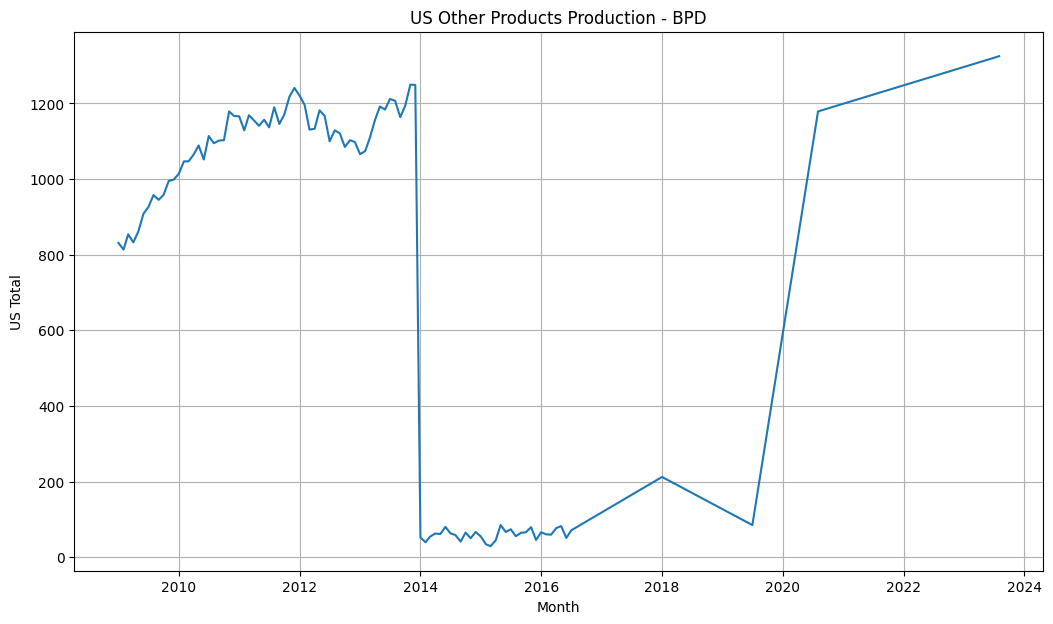

In [29]:
#Visualize the dataframe i.e. Canadian total production in BPD
plt.figure(figsize=(12.5,7))
sns.lineplot(data=df_crude, x="Month", y="US Total")
plt.title("US Other Products Production - BPD")
plt.grid(True)
plt.show()

Prophet expects that the format of the dataframe to be specific. The model expects a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.

# **Save the final data after Pre-Processing**

In [30]:
df_crude.to_csv('C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/Deployment/US_OtherOil_Final.csv', index=False)

# As there are many Null Values for many months after July 2016 , hence I will consider data only till 2016 for training & validation

In [31]:
df_crude=df_crude[(df_crude['Month']>='2009-01-01') & (df_crude['Month']<='2016-12-01')]

# Plot for the reduced dataset

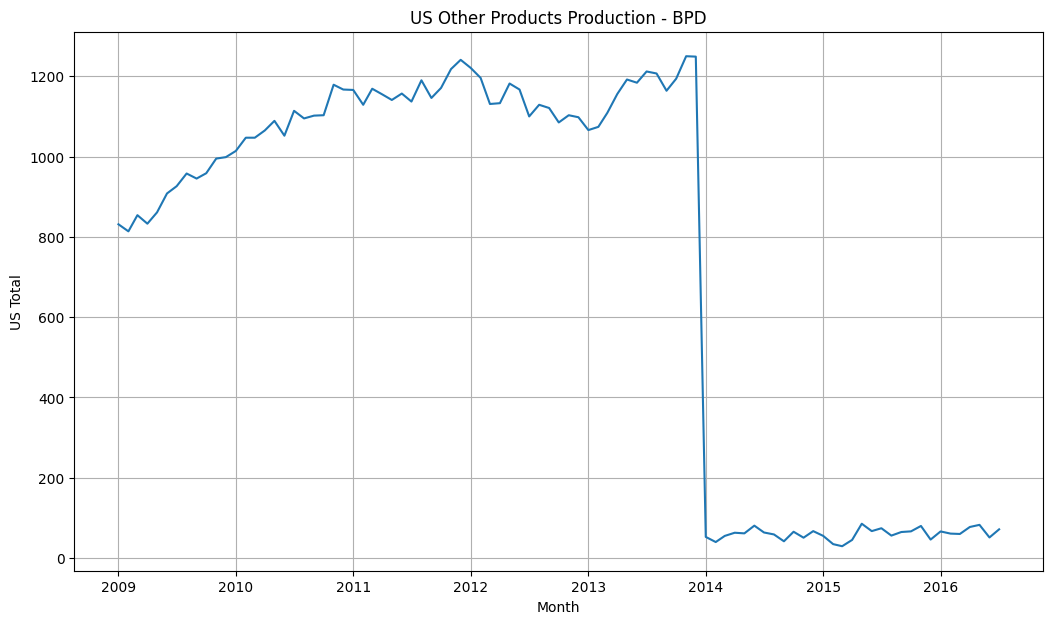

In [32]:
#Visualize the dataframe i.e. Canadian total production in BPD
plt.figure(figsize=(12.5,7))
sns.lineplot(data=df_crude, x="Month", y="US Total")
plt.title("US Other Products Production - BPD")
plt.grid(True)
plt.show()

In [33]:
df_crude_train=df_crude[(df_crude['Month']>='2009-01-01') & (df_crude['Month']<='2016-12-01')]

In [ ]:
df_crude_train.columns = ["ds","y"]
df_crude.columns = ["ds","y"]

#model = Prophet()

# Add a 'cap' column for carrying capacity to the dataset
# capacity_value = 13000  # Example capacity value, maximum data point in the
# df_crude['cap'] = capacity_value

# # Assuming you have dates of changes
# changepoints = ['2012-12-01','2013-12-01','2015-04-01','2015-11-01','2016-01-01','2016-06-01']

# model = Prophet(
#     growth='linear',               # Model growth trend, either 'linear' or 'logistic'
#     yearly_seasonality='auto',     # Automatically detect yearly seasonality
#     weekly_seasonality='auto',     # Automatically detect weekly seasonality
#     daily_seasonality='auto',      # Automatically detect daily seasonality
#     holidays=None,                 # No holidays dataset included by default
#     seasonality_mode='multiplicative',   # Seasonality mode, either 'additive' or 'multiplicative'
#     seasonality_prior_scale=6.0,  # Strength of the seasonality model
#     holidays_prior_scale=1.0,     # Strength of the holiday components model
#     changepoint_prior_scale=0.001,  # Flexibility of the automatic changepoint selection
#     mcmc_samples=0,                # Number of MCMC samples to draw. Default (0) uses Maximum a Posteriori estimation
#     interval_width=0.80,       # Number of simulated draws used to estimate uncertainty intervals
#     uncertainty_samples=500,       # Number of simulated draws used to estimate uncertainty intervals
#     changepoints=changepoints       # Adding the specified changepoints
# )

# model.fit(df_crude_train)

# Grid Search CV for the Best Model:

In [35]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Define a range of parameters to test
param_grid = {
    'changepoint_prior_scale': [0.0001,0.001, 0.01, 0.1,0.25,0.45, 0.55, 0.65, 0.75, 0.85,0.95],
    'seasonality_prior_scale': [1.0, 5.0, 10.0,12,15.0,18, 20.0,24],
    'holidays_prior_scale': [0.1, 1.0, 3.0, 6.0, 9.0, 10.0, 12.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Placeholder for the best parameters and score
best_params = None
best_score = float('inf')

# Loop over all combinations of parameters
for cps in param_grid['changepoint_prior_scale']:
    for sps in param_grid['seasonality_prior_scale']:
        for hps in param_grid['holidays_prior_scale']:
            for sm in param_grid['seasonality_mode']:
                # Create and fit the model
                model = Prophet(
                    growth='linear',
                    yearly_seasonality='auto',
                    weekly_seasonality='auto',
                    daily_seasonality='auto',
                    holidays=None,
                    seasonality_mode=sm,
                    seasonality_prior_scale=sps,
                    holidays_prior_scale=hps,
                    changepoint_prior_scale=cps,
                    mcmc_samples=0,
                    interval_width=0.80,
                    uncertainty_samples=500
                )
                model.fit(df_crude)

                # Make predictions (you'll need a future dataframe for this)
                future = model.make_future_dataframe(periods= 19, freq='m')
                forecast = model.predict(future)

                # Evaluate the model (use an appropriate method based on your data)
                # Here's an example using RMSE
                y_true = df_crude['y']
                y_pred = forecast['yhat'][:len(y_true)]
                score = np.sqrt(mean_squared_error(y_true, y_pred))

                # Update best score and parameters
                if score < best_score:
                    best_score = score
                    best_params = {
                        'changepoint_prior_scale': cps,
                        'seasonality_prior_scale': sps,
                        'holidays_prior_scale': hps,
                        'seasonality_mode': sm
                    }

# Print the best parameters
print(f"Best Parameters: {best_params}")


23:20:58 - cmdstanpy - INFO - Chain [1] start processing
23:21:22 - cmdstanpy - INFO - Chain [1] done processing
23:21:23 - cmdstanpy - INFO - Chain [1] start processing
23:21:23 - cmdstanpy - INFO - Chain [1] done processing
23:21:23 - cmdstanpy - INFO - Chain [1] start processing
23:21:44 - cmdstanpy - INFO - Chain [1] done processing
23:21:45 - cmdstanpy - INFO - Chain [1] start processing
23:21:45 - cmdstanpy - INFO - Chain [1] done processing
23:21:45 - cmdstanpy - INFO - Chain [1] start processing
23:22:08 - cmdstanpy - INFO - Chain [1] done processing
23:22:08 - cmdstanpy - INFO - Chain [1] start processing
23:22:08 - cmdstanpy - INFO - Chain [1] done processing
23:22:09 - cmdstanpy - INFO - Chain [1] start processing
23:22:30 - cmdstanpy - INFO - Chain [1] done processing
23:22:31 - cmdstanpy - INFO - Chain [1] start processing
23:22:31 - cmdstanpy - INFO - Chain [1] done processing
23:22:31 - cmdstanpy - INFO - Chain [1] start processing
23:22:54 - cmdstanpy - INFO - Chain [1]

KeyboardInterrupt: 

In [39]:
best_params

{'changepoint_prior_scale': 0.95,
 'seasonality_prior_scale': 12,
 'holidays_prior_scale': 0.1,
 'seasonality_mode': 'additive'}

In [40]:
model.params

OrderedDict([('lp__', array([[168.034]])),
             ('k', array([[1.05964]])),
             ('m', array([[0.667345]])),
             ('delta',
              array([[-4.08330e-07,  6.71644e-07,  2.36366e-07,  2.54399e-07,
                      -9.23463e-05, -5.07603e-01, -6.94437e-04, -3.33749e-04,
                      -1.30876e-03, -4.68623e-01, -2.00131e-04, -4.13849e-01,
                      -6.60593e-04,  4.12995e-07,  4.59129e-07,  1.07789e-02,
                       1.19892e+00, -8.70291e-08, -3.50363e-06, -1.77290e+01,
                       7.84805e-08,  1.68624e+01,  3.50575e-04,  9.58105e-03,
                       1.50825e-04]])),
             ('sigma_obs', array([[0.0621991]])),
             ('beta',
              array([[-0.0104874 ,  0.0115035 , -0.0877691 ,  0.153493  , -0.00397006,
                       0.014143  , -0.178637  , -0.00332344, -0.0889049 , -0.0900181 ,
                      -0.0685121 , -0.00846472, -0.0968897 ,  0.077023  , -0.178304  ,
            

Now its time to start forecasting. With Prophet, we start by building some future time data with the following command:

In [41]:
future = model.make_future_dataframe(periods= 19, freq='m')

In this line of code, we created a pandas dataframe with 60 (periods = 60) future data points with a monthly frequency (freq = ‘m’). In the next line of code, we check the last five dates of the forecasted data.

In [42]:
future.head()

,ds
0,2009-01-01
1,2009-02-01
2,2009-03-01
3,2009-04-01
4,2009-05-01


In [43]:
future.tail()

,ds
105,2017-09-30
106,2017-10-31
107,2017-11-30
108,2017-12-31
109,2018-01-31


Now, we will try to predict the actual values using Prophet library and check the last five elements of the forecast.

In [44]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
105,2017-09-30,68.209559,-504.899340,727.342198,-471.189746,701.827027,0.014530,0.014530,0.014530,0.014530,0.014530,0.014530,0.0,0.0,0.0,69.200621
106,2017-10-31,68.484891,-571.476062,780.753056,-528.013601,763.730814,0.022243,0.022243,0.022243,0.022243,0.022243,0.022243,0.0,0.0,0.0,70.008199
107,2017-11-30,68.751342,-646.043455,875.926375,-598.332525,838.872388,0.035069,0.035069,0.035069,0.035069,0.035069,0.035069,0.0,0.0,0.0,71.162357
108,2017-12-31,69.026674,-707.719881,955.444625,-666.774062,908.594660,0.029102,0.029102,0.029102,0.029102,0.029102,0.029102,0.0,0.0,0.0,71.035489
109,2018-01-31,69.302007,-732.558114,954.226642,-739.598058,994.120265,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,0.0,0.0,0.0,66.930264


If we take a look at the data using .tail(), we notice there are a bunch of columns in the forecast dataframe. The important ones (for now) are ‘ds’ (datetime), ‘yhat’ (forecast), ‘yhat_lower’ and ‘yhat_upper’ (uncertainty levels).

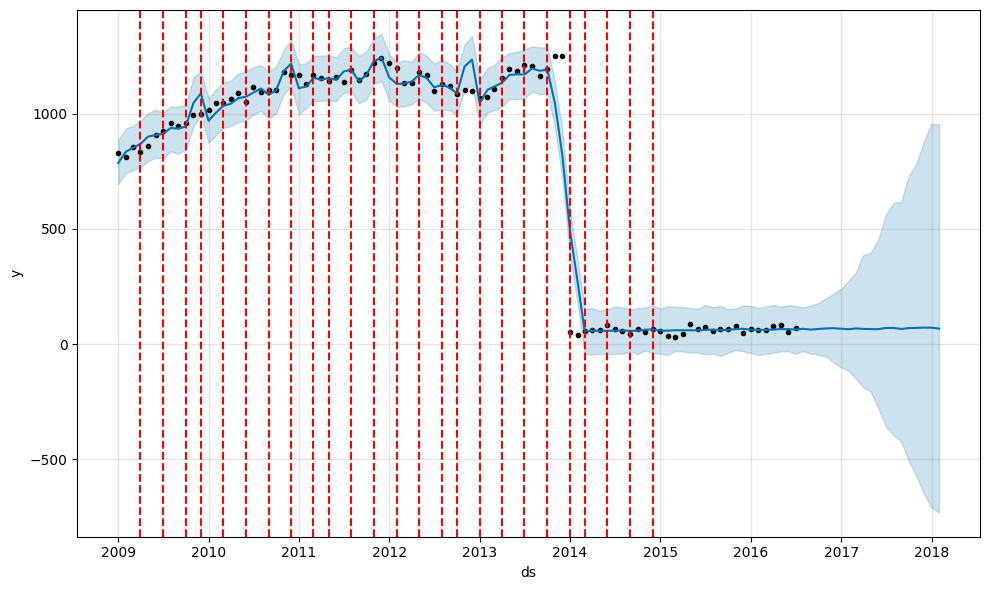

In [45]:
# Plot the forecast
fig = model.plot(forecast)

# Extract changepoints and highlight them
for changepoint in model.changepoints:
    plt.axvline(changepoint, ls='--', c='red',label='Predicted')

plt.show()

In [46]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2009-01-01,785.675557,694.462622,886.963823
1,2009-02-01,834.644638,743.125746,936.002965
2,2009-03-01,850.795995,753.468023,945.749148
3,2009-04-01,868.406329,767.572698,970.458506
4,2009-05-01,899.781471,793.243315,1001.972251


In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2009-01-01,834.181250,694.462622,886.963823,834.181250,834.181250,-0.058148,-0.058148,-0.058148,-0.058148,-0.058148,-0.058148,0.0,0.0,0.0,785.675557
1,2009-02-01,849.177981,743.125746,936.002965,849.177981,849.177981,-0.017115,-0.017115,-0.017115,-0.017115,-0.017115,-0.017115,0.0,0.0,0.0,834.644638
2,2009-03-01,862.723416,753.468023,945.749148,862.723416,862.723416,-0.013825,-0.013825,-0.013825,-0.013825,-0.013825,-0.013825,0.0,0.0,0.0,850.795995
3,2009-04-01,877.720147,767.572698,970.458506,877.720147,877.720147,-0.010611,-0.010611,-0.010611,-0.010611,-0.010611,-0.010611,0.0,0.0,0.0,868.406329
4,2009-05-01,892.233107,793.243315,1001.972251,892.233107,892.233107,0.008460,0.008460,0.008460,0.008460,0.008460,0.008460,0.0,0.0,0.0,899.781471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2017-09-30,68.209559,-504.899340,727.342198,-471.189746,701.827027,0.014530,0.014530,0.014530,0.014530,0.014530,0.014530,0.0,0.0,0.0,69.200621
106,2017-10-31,68.484891,-571.476062,780.753056,-528.013601,763.730814,0.022243,0.022243,0.022243,0.022243,0.022243,0.022243,0.0,0.0,0.0,70.008199
107,2017-11-30,68.751342,-646.043455,875.926375,-598.332525,838.872388,0.035069,0.035069,0.035069,0.035069,0.035069,0.035069,0.0,0.0,0.0,71.162357
108,2017-12-31,69.026674,-707.719881,955.444625,-666.774062,908.594660,0.029102,0.029102,0.029102,0.029102,0.029102,0.029102,0.0,0.0,0.0,71.035489


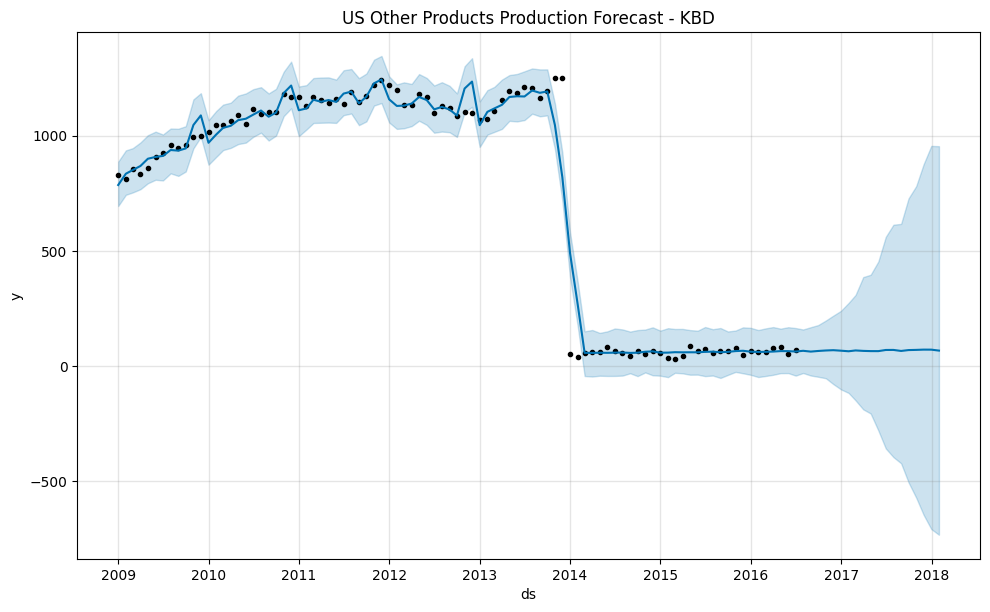

In [48]:
# Plot the graph of this data to get an understanding of how well forecast looks
model.plot(forecast);
plt.title("US Other Products Production Forecast - KBD")
plt.show()

In [49]:
df_crude.tail()

,ds,y
690,2016-03-01,59.77
691,2016-04-01,77.17
692,2016-05-01,82.45
693,2016-06-01,51.07
694,2016-07-01,71.32


In [50]:
#len(df_crude['y'][:260].values)

In [51]:
#len(forecast['yhat'][:260].values)

Next, we will check the model robustness using the best metrics for measuring accuracy of this model. Utilizing a combination of R-Squared, Mean Squared Error and Mean Absolute Error will help us to gauge the quality of our model. We will Python's Scikit-Learn library to quickly calculate these metrics.

# Merge Actual & Forecast dataset based on 'ds'(Date Column)

In [52]:
df_crude.columns = ["ds","y"]

merged_df = df_crude.merge(forecast, on='ds', how='outer')

In [53]:
merged_df.fillna(value=0,inplace=True)

In [54]:
merged_df.head()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2009-01-01,831.3,834.181250,694.462622,886.963823,834.181250,834.181250,-0.058148,-0.058148,-0.058148,-0.058148,-0.058148,-0.058148,0.0,0.0,0.0,785.675557
1,2009-02-01,813.7,849.177981,743.125746,936.002965,849.177981,849.177981,-0.017115,-0.017115,-0.017115,-0.017115,-0.017115,-0.017115,0.0,0.0,0.0,834.644638
2,2009-03-01,854.0,862.723416,753.468023,945.749148,862.723416,862.723416,-0.013825,-0.013825,-0.013825,-0.013825,-0.013825,-0.013825,0.0,0.0,0.0,850.795995
3,2009-04-01,832.8,877.720147,767.572698,970.458506,877.720147,877.720147,-0.010611,-0.010611,-0.010611,-0.010611,-0.010611,-0.010611,0.0,0.0,0.0,868.406329
4,2009-05-01,861.0,892.233107,793.243315,1001.972251,892.233107,892.233107,0.008460,0.008460,0.008460,0.008460,0.008460,0.008460,0.0,0.0,0.0,899.781471


In [55]:
merged_df.tail()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
105,2017-09-30,0.0,68.209559,-504.899340,727.342198,-471.189746,701.827027,0.014530,0.014530,0.014530,0.014530,0.014530,0.014530,0.0,0.0,0.0,69.200621
106,2017-10-31,0.0,68.484891,-571.476062,780.753056,-528.013601,763.730814,0.022243,0.022243,0.022243,0.022243,0.022243,0.022243,0.0,0.0,0.0,70.008199
107,2017-11-30,0.0,68.751342,-646.043455,875.926375,-598.332525,838.872388,0.035069,0.035069,0.035069,0.035069,0.035069,0.035069,0.0,0.0,0.0,71.162357
108,2017-12-31,0.0,69.026674,-707.719881,955.444625,-666.774062,908.594660,0.029102,0.029102,0.029102,0.029102,0.029102,0.029102,0.0,0.0,0.0,71.035489
109,2018-01-31,0.0,69.302007,-732.558114,954.226642,-739.598058,994.120265,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,0.0,0.0,0.0,66.930264


In [56]:
merged_df['y'][72:92]

72    55.03
73    34.43
74    29.23
75    44.93
76    85.26
77    66.87
78    74.03
79    55.71
80    64.63
81    66.26
82    79.70
83    45.81
84    66.06
85    60.66
86    59.77
87    77.17
88    82.45
89    51.07
90    71.32
91     0.00
Name: y, dtype: float64

In [57]:
merged_df['yhat'][72:92]

72    57.872632
73    58.154663
74    60.001915
75    59.409390
76    59.675196
77    59.478336
78    61.557716
79    62.224964
80    59.782764
81    61.504034
82    64.777771
83    66.192785
84    62.128640
85    61.104375
86    61.665653
87    62.677712
88    64.778827
89    64.576627
90    62.833220
91    66.025486
Name: yhat, dtype: float64

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 36 mont
y_true = merged_df['y'][0:90].values
y_pred = merged_df['yhat'][0:90].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.2f' % mae)
r = r2_score(y_true, y_pred)
print('R-squared Score: %.2f' % r)

MAE: 33.64
R-squared Score: 0.98


For the US crude oil time-series data, the Prophet model gives an R-squared value of 1 i.e. 98% of variance in our data set is explained by the model. The MAE is calculated to be 33.72 i.e. for each data point, the average magnitude error is roughly 33.72 barrels, considering that our production value is in thousands of barrels.

Finally, we create a plot to compare actual vs. predicted values to give a clear understanding of how our model visually looks against the existing US crude oil production dataset.

In [59]:
df_crude.tail()

,ds,y
690,2016-03-01,59.77
691,2016-04-01,77.17
692,2016-05-01,82.45
693,2016-06-01,51.07
694,2016-07-01,71.32


In [60]:
merged_df.tail()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
105,2017-09-30,0.0,68.209559,-504.899340,727.342198,-471.189746,701.827027,0.014530,0.014530,0.014530,0.014530,0.014530,0.014530,0.0,0.0,0.0,69.200621
106,2017-10-31,0.0,68.484891,-571.476062,780.753056,-528.013601,763.730814,0.022243,0.022243,0.022243,0.022243,0.022243,0.022243,0.0,0.0,0.0,70.008199
107,2017-11-30,0.0,68.751342,-646.043455,875.926375,-598.332525,838.872388,0.035069,0.035069,0.035069,0.035069,0.035069,0.035069,0.0,0.0,0.0,71.162357
108,2017-12-31,0.0,69.026674,-707.719881,955.444625,-666.774062,908.594660,0.029102,0.029102,0.029102,0.029102,0.029102,0.029102,0.0,0.0,0.0,71.035489
109,2018-01-31,0.0,69.302007,-732.558114,954.226642,-739.598058,994.120265,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,0.0,0.0,0.0,66.930264


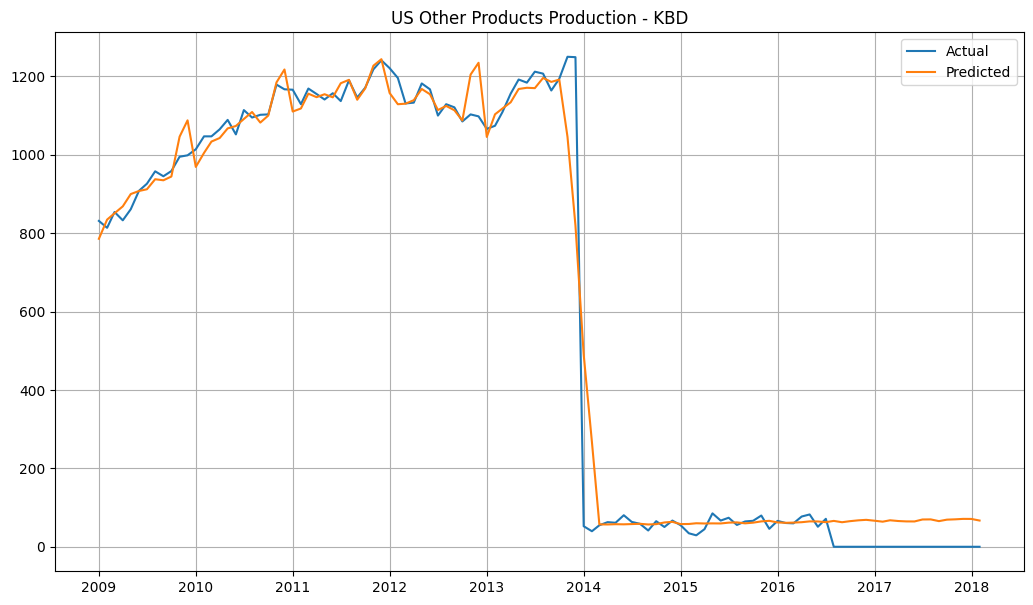

In [61]:
plt.figure(figsize=(12.5,7))
# plot expected vs actual
plt.plot(merged_df['ds'],merged_df['y'], label='Actual')
plt.plot(merged_df['ds'],merged_df['yhat'], label='Predicted')
plt.title("US Other Products Production - KBD")
plt.grid(True)
plt.legend()
plt.show()

# **Evaluation Metrics**

In [81]:
merged_df.head()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2009-01-01,831.3,834.181250,694.462622,886.963823,834.181250,834.181250,-0.058148,-0.058148,-0.058148,-0.058148,-0.058148,-0.058148,0.0,0.0,0.0,785.675557
1,2009-02-01,813.7,849.177981,743.125746,936.002965,849.177981,849.177981,-0.017115,-0.017115,-0.017115,-0.017115,-0.017115,-0.017115,0.0,0.0,0.0,834.644638
2,2009-03-01,854.0,862.723416,753.468023,945.749148,862.723416,862.723416,-0.013825,-0.013825,-0.013825,-0.013825,-0.013825,-0.013825,0.0,0.0,0.0,850.795995
3,2009-04-01,832.8,877.720147,767.572698,970.458506,877.720147,877.720147,-0.010611,-0.010611,-0.010611,-0.010611,-0.010611,-0.010611,0.0,0.0,0.0,868.406329
4,2009-05-01,861.0,892.233107,793.243315,1001.972251,892.233107,892.233107,0.008460,0.008460,0.008460,0.008460,0.008460,0.008460,0.0,0.0,0.0,899.781471


In [82]:
merged_df.tail()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
105,2017-09-30,0.0,68.209559,-504.899340,727.342198,-471.189746,701.827027,0.014530,0.014530,0.014530,0.014530,0.014530,0.014530,0.0,0.0,0.0,69.200621
106,2017-10-31,0.0,68.484891,-571.476062,780.753056,-528.013601,763.730814,0.022243,0.022243,0.022243,0.022243,0.022243,0.022243,0.0,0.0,0.0,70.008199
107,2017-11-30,0.0,68.751342,-646.043455,875.926375,-598.332525,838.872388,0.035069,0.035069,0.035069,0.035069,0.035069,0.035069,0.0,0.0,0.0,71.162357
108,2017-12-31,0.0,69.026674,-707.719881,955.444625,-666.774062,908.594660,0.029102,0.029102,0.029102,0.029102,0.029102,0.029102,0.0,0.0,0.0,71.035489
109,2018-01-31,0.0,69.302007,-732.558114,954.226642,-739.598058,994.120265,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,-0.034223,0.0,0.0,0.0,66.930264


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

#y_true = merged_df['y'][0:90].values
#y_pred = merged_df['yhat'][0:90].values

y_true = merged_df['y'][0:60].values
y_pred = merged_df['yhat'][0:60].values

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_true, y_pred))
print("RMSE: ", rmse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE: ", mae)

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE: ", mape, "%")

RMSE:  70.8865110881707
MAE:  34.3870635650818
MAPE:  3.07621324008027 %


# **Save the Model**

In [92]:
# Save the model to a file
with open('/content/drive/MyDrive/Foundation_Project_2_Term-5/US_OtherOil_prophetModel.pkl', 'wb') as f:
    pickle.dump(model, f)

# **Load the Model**

In [93]:
# Load the model from the file
with open('/content/drive/MyDrive/Foundation_Project_2_Term-5/US_OtherOil_prophetModel.pkl', 'rb') as f:
    US_Other_loaded_model = pickle.load(f)

In [94]:
US_Other_loaded_model.params

OrderedDict([('lp__', array([[168.034]])),
             ('k', array([[1.05964]])),
             ('m', array([[0.667345]])),
             ('delta',
              array([[-4.08330e-07,  6.71644e-07,  2.36366e-07,  2.54399e-07,
                      -9.23463e-05, -5.07603e-01, -6.94437e-04, -3.33749e-04,
                      -1.30876e-03, -4.68623e-01, -2.00131e-04, -4.13849e-01,
                      -6.60593e-04,  4.12995e-07,  4.59129e-07,  1.07789e-02,
                       1.19892e+00, -8.70291e-08, -3.50363e-06, -1.77290e+01,
                       7.84805e-08,  1.68624e+01,  3.50575e-04,  9.58105e-03,
                       1.50825e-04]])),
             ('sigma_obs', array([[0.0621991]])),
             ('beta',
              array([[-0.0104874 ,  0.0115035 , -0.0877691 ,  0.153493  , -0.00397006,
                       0.014143  , -0.178637  , -0.00332344, -0.0889049 , -0.0900181 ,
                      -0.0685121 , -0.00846472, -0.0968897 ,  0.077023  , -0.178304  ,
            